In [15]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [16]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [17]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [18]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [19]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [20]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [21]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [22]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [23]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [24]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [25]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [26]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [27]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:10, 11.53it/s]                         


Epoch 1 of 100
Generator loss: 1.50571668, Discriminator loss: 0.84327842


118it [00:10, 11.58it/s]                         


Epoch 2 of 100
Generator loss: 3.00472614, Discriminator loss: 1.16851913


118it [00:10, 11.59it/s]                         


Epoch 3 of 100
Generator loss: 3.89558679, Discriminator loss: 1.03330522


118it [00:10, 11.57it/s]                         


Epoch 4 of 100
Generator loss: 1.94063927, Discriminator loss: 1.07226001


118it [00:10, 11.53it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


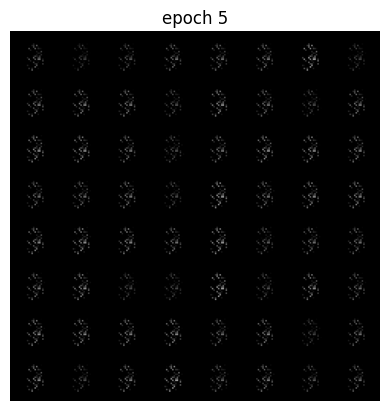

Epoch 5 of 100
Generator loss: 1.93393347, Discriminator loss: 0.86257022


118it [00:10, 11.25it/s]                         


Epoch 6 of 100
Generator loss: 1.22080266, Discriminator loss: 1.02437186


118it [00:10, 11.14it/s]                         


Epoch 7 of 100
Generator loss: 1.67889278, Discriminator loss: 1.32482724


118it [00:10, 11.22it/s]                         


Epoch 8 of 100
Generator loss: 1.71902243, Discriminator loss: 1.08099820


118it [00:10, 11.07it/s]                         


Epoch 9 of 100
Generator loss: 1.15041292, Discriminator loss: 1.17706817


118it [00:10, 11.55it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


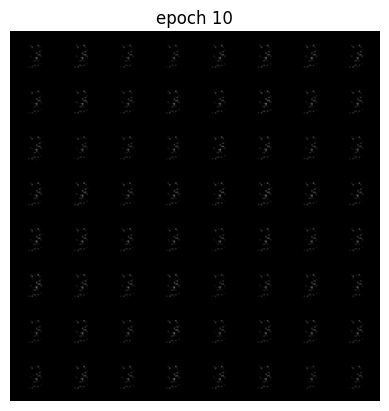

Epoch 10 of 100
Generator loss: 1.42107136, Discriminator loss: 1.04482505


118it [00:10, 11.56it/s]                         


Epoch 11 of 100
Generator loss: 1.12064157, Discriminator loss: 1.16134731


118it [00:10, 11.68it/s]                         


Epoch 12 of 100
Generator loss: 1.67128596, Discriminator loss: 1.02858725


118it [00:10, 11.69it/s]                         


Epoch 13 of 100
Generator loss: 1.04961227, Discriminator loss: 1.36745367


118it [00:10, 11.64it/s]                         


Epoch 14 of 100
Generator loss: 1.87086385, Discriminator loss: 1.00638096


118it [00:10, 11.67it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


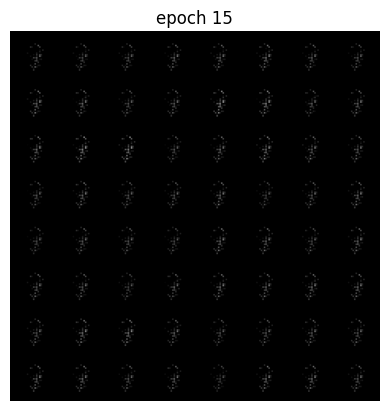

Epoch 15 of 100
Generator loss: 1.41277953, Discriminator loss: 1.19835353


118it [00:10, 11.67it/s]                         


Epoch 16 of 100
Generator loss: 2.41769871, Discriminator loss: 0.68581432


118it [00:10, 11.40it/s]                         


Epoch 17 of 100
Generator loss: 3.30017282, Discriminator loss: 0.79894208


118it [00:10, 10.95it/s]                         


Epoch 18 of 100
Generator loss: 2.38188966, Discriminator loss: 0.72728682


118it [00:11, 10.58it/s]                         


Epoch 19 of 100
Generator loss: 2.37934414, Discriminator loss: 0.73099959


118it [00:11, 10.23it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


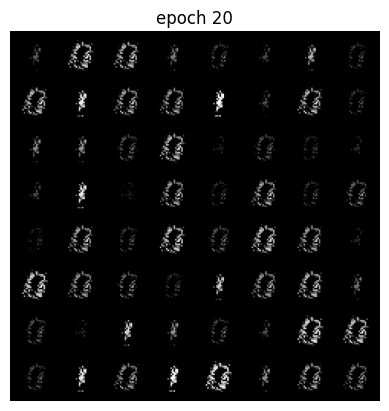

Epoch 20 of 100
Generator loss: 2.28571940, Discriminator loss: 0.72344343


118it [00:11, 10.08it/s]                         


Epoch 21 of 100
Generator loss: 2.29724016, Discriminator loss: 0.79144363


118it [00:11, 10.16it/s]                         


Epoch 22 of 100
Generator loss: 2.27458395, Discriminator loss: 0.80256125


118it [00:11, 10.15it/s]                         


Epoch 23 of 100
Generator loss: 2.24769862, Discriminator loss: 0.59149011


118it [00:11, 10.20it/s]                         


Epoch 24 of 100
Generator loss: 2.37939693, Discriminator loss: 0.72509356


118it [00:11, 10.11it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


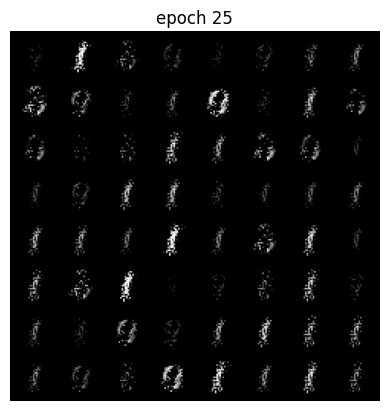

Epoch 25 of 100
Generator loss: 2.11225062, Discriminator loss: 0.68846090


118it [00:11,  9.83it/s]                         


Epoch 26 of 100
Generator loss: 2.46727760, Discriminator loss: 0.74577802


118it [00:11, 10.12it/s]                         


Epoch 27 of 100
Generator loss: 2.11441397, Discriminator loss: 0.81684897


118it [00:11, 10.03it/s]                         


Epoch 28 of 100
Generator loss: 2.31197203, Discriminator loss: 0.65362483


118it [00:11, 10.24it/s]                         


Epoch 29 of 100
Generator loss: 2.54833062, Discriminator loss: 0.58999822


118it [00:11, 10.15it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


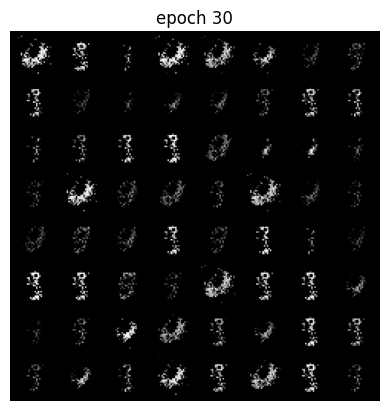

Epoch 30 of 100
Generator loss: 2.41185987, Discriminator loss: 0.63751069


118it [00:11,  9.93it/s]                         


Epoch 31 of 100
Generator loss: 2.37434385, Discriminator loss: 0.65853239


118it [00:11, 10.15it/s]                         


Epoch 32 of 100
Generator loss: 2.49721941, Discriminator loss: 0.51380482


118it [00:11, 10.21it/s]                         


Epoch 33 of 100
Generator loss: 2.25145616, Discriminator loss: 0.67185545


118it [00:11, 10.27it/s]                         


Epoch 34 of 100
Generator loss: 2.45365754, Discriminator loss: 0.56382559


118it [00:11, 10.28it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


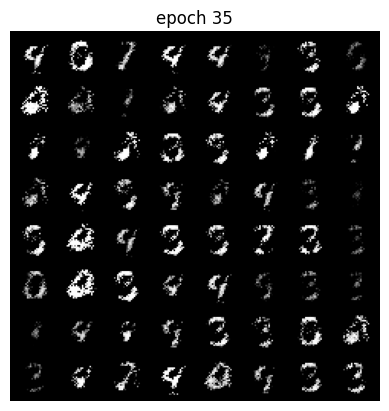

Epoch 35 of 100
Generator loss: 2.25653914, Discriminator loss: 0.72807914


118it [00:11, 10.25it/s]                         


Epoch 36 of 100
Generator loss: 2.37580808, Discriminator loss: 0.62845487


118it [00:11, 10.12it/s]                         


Epoch 37 of 100
Generator loss: 2.38590582, Discriminator loss: 0.63221839


118it [00:11, 10.07it/s]                         


Epoch 38 of 100
Generator loss: 2.76133615, Discriminator loss: 0.53201358


118it [00:11, 10.04it/s]                         


Epoch 39 of 100
Generator loss: 2.77301803, Discriminator loss: 0.53282554


118it [00:11, 10.10it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


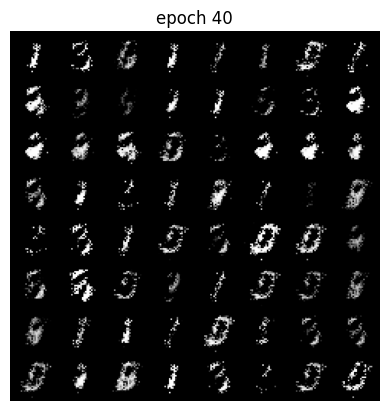

Epoch 40 of 100
Generator loss: 2.42172380, Discriminator loss: 0.59350367


118it [00:11, 10.16it/s]                         


Epoch 41 of 100
Generator loss: 3.05682827, Discriminator loss: 0.46069601


118it [00:11, 10.20it/s]                         


Epoch 42 of 100
Generator loss: 2.82438138, Discriminator loss: 0.56222464


118it [00:11, 10.24it/s]                         


Epoch 43 of 100
Generator loss: 2.64294265, Discriminator loss: 0.57686019


118it [00:11,  9.94it/s]                         


Epoch 44 of 100
Generator loss: 2.66371205, Discriminator loss: 0.60793055


118it [00:11, 10.23it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


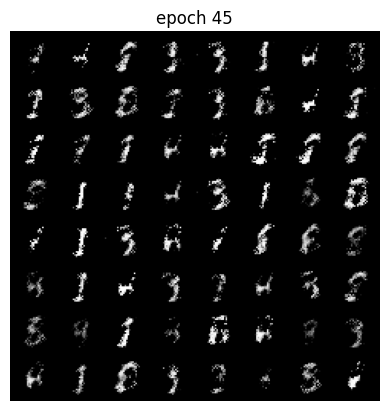

Epoch 45 of 100
Generator loss: 2.63169824, Discriminator loss: 0.53653644


118it [00:11, 10.04it/s]                         


Epoch 46 of 100
Generator loss: 2.73649772, Discriminator loss: 0.55240249


118it [00:11, 10.19it/s]                         


Epoch 47 of 100
Generator loss: 2.72259207, Discriminator loss: 0.54649390


118it [00:11, 10.24it/s]                         


Epoch 48 of 100
Generator loss: 2.85116935, Discriminator loss: 0.51992722


118it [00:11, 10.20it/s]                         


Epoch 49 of 100
Generator loss: 2.53720857, Discriminator loss: 0.64025039


118it [00:11, 10.00it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


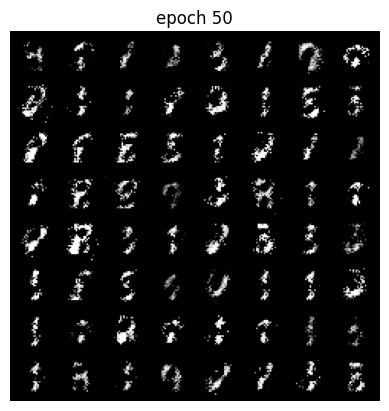

Epoch 50 of 100
Generator loss: 2.94227394, Discriminator loss: 0.45982380


118it [00:12,  9.28it/s]                         


Epoch 51 of 100
Generator loss: 2.90218509, Discriminator loss: 0.52360369


118it [00:12,  9.41it/s]                         


Epoch 52 of 100
Generator loss: 3.20164743, Discriminator loss: 0.46065408


118it [00:12,  9.44it/s]                         


Epoch 53 of 100
Generator loss: 2.82473284, Discriminator loss: 0.55861524


118it [00:12,  9.50it/s]                         


Epoch 54 of 100
Generator loss: 2.84892488, Discriminator loss: 0.57498510


118it [00:12,  9.68it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


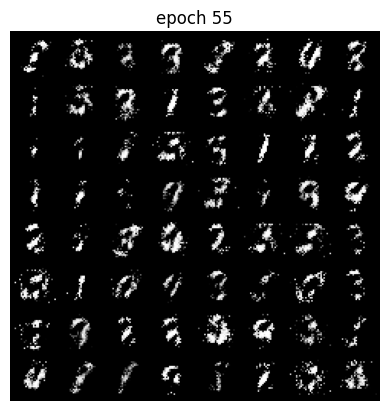

Epoch 55 of 100
Generator loss: 2.86858864, Discriminator loss: 0.51633663


118it [00:11, 10.02it/s]                         


Epoch 56 of 100
Generator loss: 3.06068130, Discriminator loss: 0.49669562


118it [00:11, 10.30it/s]                         


Epoch 57 of 100
Generator loss: 2.92209927, Discriminator loss: 0.49042134


118it [00:11, 10.45it/s]                         


Epoch 58 of 100
Generator loss: 3.09300557, Discriminator loss: 0.49779349


118it [00:11, 10.25it/s]                         


Epoch 59 of 100
Generator loss: 2.91409069, Discriminator loss: 0.51946024


118it [00:11, 10.27it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


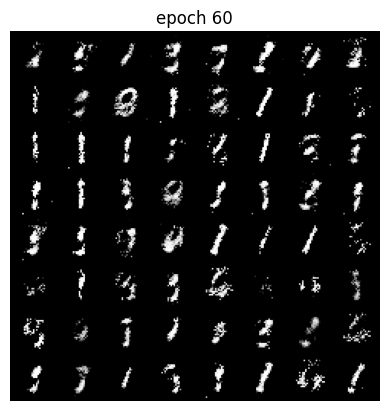

Epoch 60 of 100
Generator loss: 2.76945289, Discriminator loss: 0.55443651


118it [00:11, 10.22it/s]                         


Epoch 61 of 100
Generator loss: 2.68606621, Discriminator loss: 0.56307845


118it [00:11, 10.38it/s]                         


Epoch 62 of 100
Generator loss: 2.80770627, Discriminator loss: 0.56524027


118it [00:11, 10.42it/s]                         


Epoch 63 of 100
Generator loss: 2.39239151, Discriminator loss: 0.63686895


118it [00:11, 10.41it/s]                         


Epoch 64 of 100
Generator loss: 2.43217107, Discriminator loss: 0.60447401


118it [00:11, 10.48it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


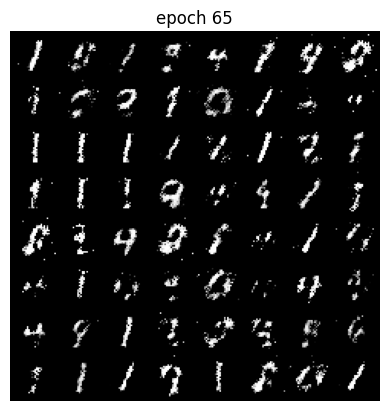

Epoch 65 of 100
Generator loss: 2.59407543, Discriminator loss: 0.56754997


118it [00:11, 10.28it/s]                         


Epoch 66 of 100
Generator loss: 2.58851301, Discriminator loss: 0.54614680


118it [00:11, 10.35it/s]                         


Epoch 67 of 100
Generator loss: 2.59598098, Discriminator loss: 0.58535642


118it [00:11, 10.32it/s]                         


Epoch 68 of 100
Generator loss: 2.43402380, Discriminator loss: 0.59176132


118it [00:11, 10.12it/s]                         


Epoch 69 of 100
Generator loss: 2.56316432, Discriminator loss: 0.64222668


118it [00:11, 10.18it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


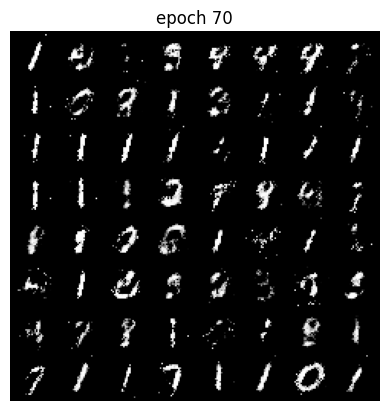

Epoch 70 of 100
Generator loss: 2.46790701, Discriminator loss: 0.58679793


118it [00:11, 10.11it/s]                         


Epoch 71 of 100
Generator loss: 2.59118549, Discriminator loss: 0.58387436


118it [00:11, 10.26it/s]                         


Epoch 72 of 100
Generator loss: 2.23187225, Discriminator loss: 0.72417637


118it [00:11, 10.09it/s]                         


Epoch 73 of 100
Generator loss: 2.32029883, Discriminator loss: 0.66037711


118it [00:11, 10.24it/s]                         


Epoch 74 of 100
Generator loss: 2.42799563, Discriminator loss: 0.60677125


118it [00:11, 10.35it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


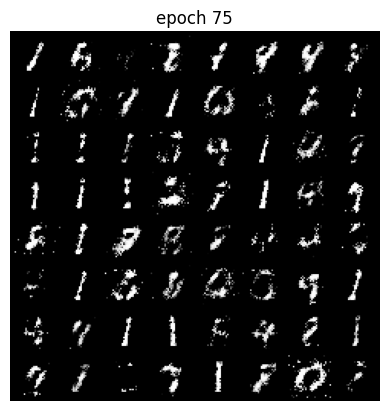

Epoch 75 of 100
Generator loss: 2.53838260, Discriminator loss: 0.58707784


118it [00:11, 10.35it/s]                         


Epoch 76 of 100
Generator loss: 2.52617599, Discriminator loss: 0.63123078


118it [00:11, 10.31it/s]                         


Epoch 77 of 100
Generator loss: 2.44927688, Discriminator loss: 0.62832736


118it [00:11, 10.03it/s]                         


Epoch 78 of 100
Generator loss: 2.39755622, Discriminator loss: 0.61057238


118it [00:11, 10.18it/s]                         


Epoch 79 of 100
Generator loss: 2.42723554, Discriminator loss: 0.63659954


118it [00:11, 10.21it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


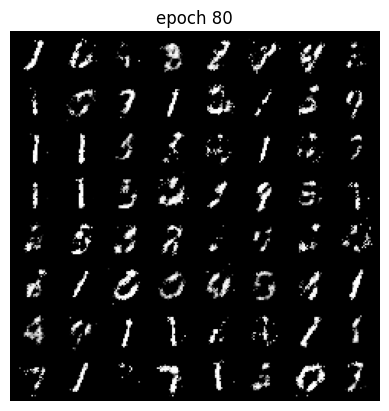

Epoch 80 of 100
Generator loss: 2.18762691, Discriminator loss: 0.69280685


118it [00:11,  9.95it/s]                         


Epoch 81 of 100
Generator loss: 2.17585210, Discriminator loss: 0.70892522


118it [00:11,  9.88it/s]                         


Epoch 82 of 100
Generator loss: 2.26904602, Discriminator loss: 0.69746136


118it [00:12,  9.63it/s]                         


Epoch 83 of 100
Generator loss: 2.18347096, Discriminator loss: 0.67573837


118it [00:12,  9.60it/s]                         


Epoch 84 of 100
Generator loss: 2.27077661, Discriminator loss: 0.69063407


118it [00:12,  9.50it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


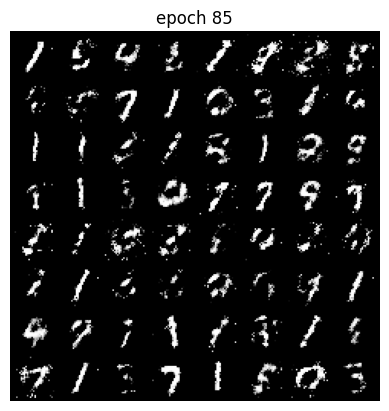

Epoch 85 of 100
Generator loss: 2.14384048, Discriminator loss: 0.72023453


118it [00:12,  9.63it/s]                         


Epoch 86 of 100
Generator loss: 2.13530026, Discriminator loss: 0.69431865


118it [00:11,  9.89it/s]                         


Epoch 87 of 100
Generator loss: 2.18035788, Discriminator loss: 0.72051731


118it [00:11, 10.26it/s]                         


Epoch 88 of 100
Generator loss: 2.04098422, Discriminator loss: 0.77333750


118it [00:11, 10.45it/s]                         


Epoch 89 of 100
Generator loss: 1.98858401, Discriminator loss: 0.77378364


118it [00:11, 10.46it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


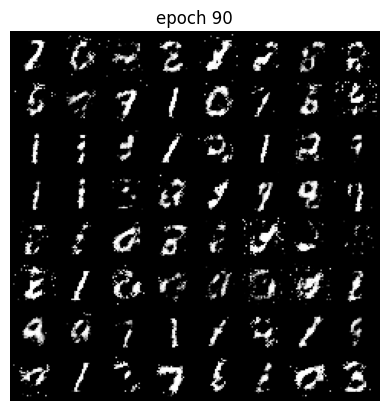

Epoch 90 of 100
Generator loss: 2.04054636, Discriminator loss: 0.80354446


118it [00:11, 10.39it/s]                         


Epoch 91 of 100
Generator loss: 2.10612381, Discriminator loss: 0.74026394


118it [00:11, 10.09it/s]                         


Epoch 92 of 100
Generator loss: 2.05884968, Discriminator loss: 0.76475389


118it [00:11, 10.00it/s]                         


Epoch 93 of 100
Generator loss: 2.03621627, Discriminator loss: 0.78010980


118it [00:11,  9.99it/s]                         


Epoch 94 of 100
Generator loss: 2.06586477, Discriminator loss: 0.77354869


118it [00:11, 10.17it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


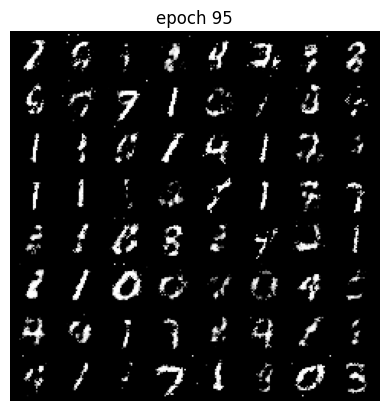

Epoch 95 of 100
Generator loss: 2.13786711, Discriminator loss: 0.72489119


118it [00:11, 10.23it/s]                         


Epoch 96 of 100
Generator loss: 2.10724372, Discriminator loss: 0.75806700


118it [00:11, 10.34it/s]                         


Epoch 97 of 100
Generator loss: 2.00517996, Discriminator loss: 0.78139099


118it [00:11, 10.34it/s]                         


Epoch 98 of 100
Generator loss: 2.05184446, Discriminator loss: 0.74762206


118it [00:11, 10.25it/s]                         


Epoch 99 of 100
Generator loss: 2.06078753, Discriminator loss: 0.73967978


118it [00:11, 10.35it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


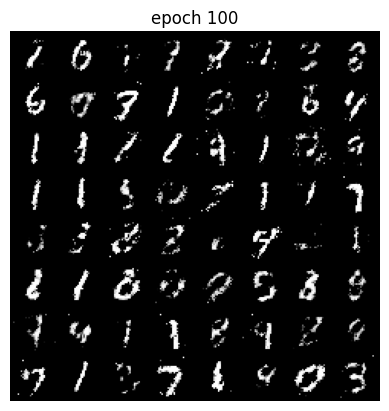

Epoch 100 of 100
Generator loss: 2.04204680, Discriminator loss: 0.75800632


In [28]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    pass
    
    
    ######################################
    
def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    pass
    
    
    ######################################
    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
        # Sample minibatch of n_z noise samples from noise prior p_g(z)
        noise_samples = create_noise(batch_size, nz)

        # Update the discriminator by ascending its stochastic gradient by separating the real/fake images and adding noise
        optim_d.zero_grad()
        loss_d_batch_real = criterion(discriminator((data[0] + 0.1 * torch.randn_like(data[0])).to(device)), label_real(data[0].size()[0]))
        loss_d_batch_real.backward()

        loss_d_batch_fake = criterion(discriminator(generator(noise_samples) + 0.1 * torch.randn_like(generator(noise_samples))), label_fake(noise_samples.size()[0]))
        loss_d_batch_fake.backward()
        optim_d.step()
        loss_d += loss_d_batch_real.detach().item() + loss_d_batch_fake.detach().item()

        # Sample minitbatch of n_z noise samples from noise prior p_g(z)
        noise_samples = create_noise(batch_size, nz)

        # Update the generator by ascending its stochastic gradient
        optim_g.zero_grad()
        loss_g_batch = criterion(discriminator(generator(noise_samples)), label_real(noise_samples.size()[0]))
        loss_g_batch.backward()
        loss_g += loss_g_batch.detach().item()
        optim_g.step()
    
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [29]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [30]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

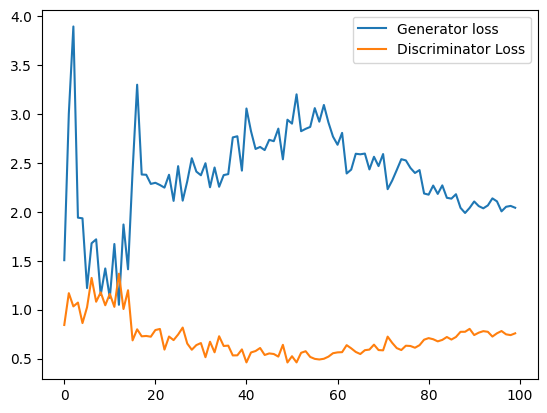

In [31]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')

In [32]:
print(losses_g)

[1.5057166776595972, 3.00472613532319, 3.8955867919656963, 1.9406392681292999, 1.9339334664181766, 1.2208026609359643, 1.6788927846484714, 1.7190224276139185, 1.150412919684353, 1.421071361272763, 1.1206415731173296, 1.6712859604093764, 1.0496122704611883, 1.870863848262363, 1.4127795324366317, 2.417698705298269, 3.3001728200504923, 2.3818896575870676, 2.37934414189086, 2.285719397740486, 2.2972401635259643, 2.2745839464358792, 2.2476986157588468, 2.379396931737916, 2.1122506153889193, 2.4672776012339144, 2.1144139736126633, 2.311972025113228, 2.5483306198038607, 2.4118598719947357, 2.3743438506737733, 2.497219410716978, 2.251456156755105, 2.4536575445762048, 2.2565391359166203, 2.375808080037435, 2.385905818042592, 2.7613361462568626, 2.7730180320576725, 2.42172379575224, 3.05682826653505, 2.8243813759241347, 2.6429426547808523, 2.66371204608526, 2.6316982354873266, 2.7364977231392493, 2.722592074646909, 2.8511693477630615, 2.537208570374383, 2.9422739448710384, 2.902185091605553, 3.2